In [1]:
!pip install pysiology

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pysiology
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("als10.ts",sep="\t",names=["Elapsed Time (sec)","Left Stride Interval (sec)","Right Stride Interval (sec)","Left Swing Interval (sec)","Right Swing Interval (sec)","Left Swing Interval (% of stride)","Right Swing Interval (% of stride)",\
                                           "Left Stance Interval (sec)","Right Stance Interval (sec)","Left Stance Interval (% of stride)","Right Stance Interval (% of stride)","Double Support Interval (sec)","Double Support Interval (% of stride)"])

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore. https://doi.org/10.1007/978-981-13-8950-4_35


In [2]:
df

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride)
0,21.7800,1.1200,1.1300,0.3567,0.3800,31.85,33.63,0.7633,0.7500,68.15,66.37,0.3833,34.23
1,22.8933,1.1133,1.0967,0.3867,0.3533,34.73,32.22,0.7267,0.7433,65.27,67.78,0.3733,33.53
2,23.9900,1.0967,1.0933,0.3600,0.3433,32.83,31.40,0.7367,0.7500,67.17,68.60,0.3933,35.87
3,25.0967,1.1067,1.1000,0.3400,0.3433,30.72,31.21,0.7667,0.7567,69.28,68.79,0.4233,38.25
4,26.2067,1.1100,1.1133,0.3933,0.3867,35.44,34.73,0.7167,0.7267,64.56,65.27,0.3300,29.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,295.1033,1.1167,1.1300,0.3567,0.3600,31.94,31.86,0.7600,0.7700,68.06,68.14,0.4000,35.82
242,296.2300,1.1267,1.1267,0.3633,0.3600,32.25,31.95,0.7633,0.7667,67.75,68.05,0.4033,35.80
243,297.3100,1.0800,1.0867,0.3567,0.3333,33.02,30.67,0.7233,0.7533,66.98,69.33,0.3900,36.11
244,298.4233,1.1133,1.1233,0.3567,0.3567,32.04,31.75,0.7567,0.7667,67.96,68.25,0.4000,35.93


<Axes: >

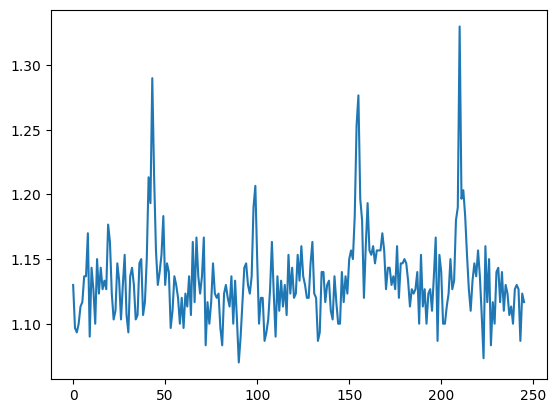

In [3]:
df["Right Stride Interval (sec)"].plot()

In [4]:
right = df["Right Stride Interval (sec)"]

### Fix Error

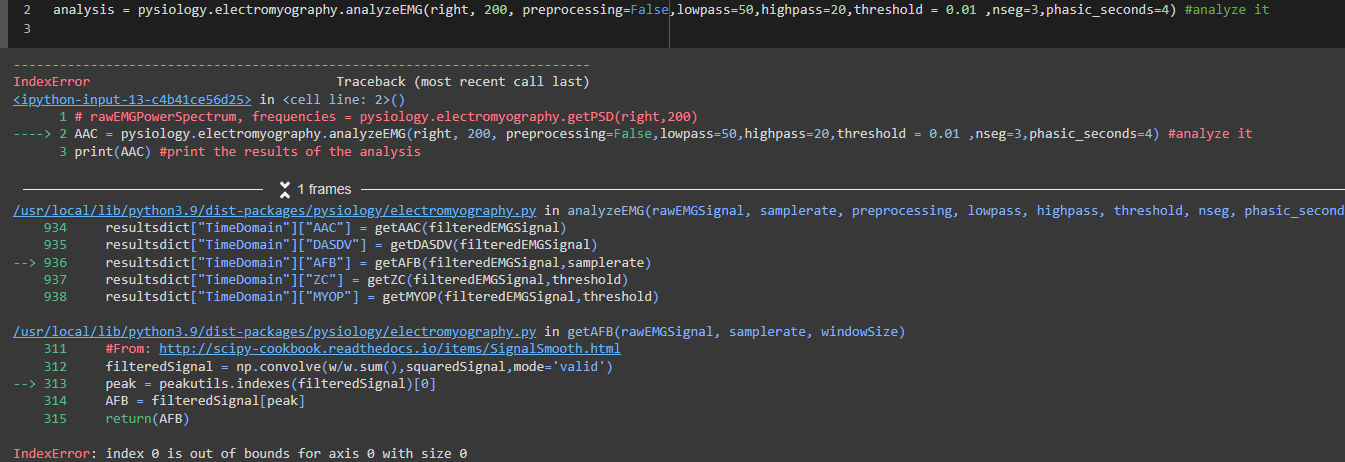

In [6]:
#@title Fix
import os,shutil
os.remove("/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py")
shutil.move("/content/electromyography.py","/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py")

'/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py'

## Analyze

In [5]:
analyzedEMG = pysiology.electromyography.analyzeEMGnew(right,samplerate=200,preprocessing=False) #analyze it
time,freq = analyzedEMG 
print(analyzedEMG[time])
print(analyzedEMG[freq])

{'IEMG': 278.8836, 'MAV': 1.1336731707317074, 'MAV1': 0.8503123983739838, 'MAV2': 0.5672613920285545, 'SSI': 316.42852396, 'VAR': 1.2915449957551022, 'TM3': 1.4607565029374148, 'TM4': 1.6604348607078325, 'TM5': 1.8892828787582616, 'LOG': 3.1070482841518894, 'RMS': 1.134149378541261, 'WL': 6.1533000000000015, 'AAC': 0.02501341463414635, 'DASDV': 0.0010627389795918355, 'ZC': 0, 'MYOP': 1.0, 'WAMP': 95, 'SSC': 142, 'MAVSLPk': [1.1315865853658535, 1.1341841463414635, 1.1352487804878049]}
{'MNF': 25.674846766727967, 'MDF': 15.447154471544716, 'PeakFrequency': 7.317073170731707, 'MNP': 1.1437132020415153e-05, 'TTP': 0.0014182043705314791, 'SM1': 0.03641217989729962, 'SM2': 6.839220397878475e-07, 'SM3': 3.124590025689144e-11, 'FR': inf, 'PSR': 1.0335386351541864, 'VCF': -659.19727424991}


/usr/local/lib/python3.9/dist-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 246, using nperseg = 246
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.9/dist-packages/pysiology/electromyography.py:690: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF


In [6]:
AAC = pysiology.electromyography.getAAC(right)
print(AAC)

0.02501341463414635
